# Session 5 Exercises
These are sample answers for the in-class exercises in Session 5 of PHAS0030.  You should make sure that you can do these yourself ! The further work exercises will be in a separate notebook.

In [2]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Matrix approach to boundary-value problems

### Question 1

In [3]:
# Set system length
N = 7
# Create arrays for diagonals
ondiag = -2*np.ones(N)
offdiag = np.ones(N-1)
# Assemble matrix and print
M = np.diag(ondiag) + np.diag(offdiag,k=1) +np.diag(offdiag,k=-1)
print(M)

[[-2.  1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  1. -2.]]


### Question 2

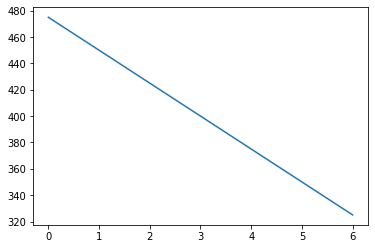

In [4]:
# Set up boundary conditions
b = np.zeros(N)
# Note that these are negative - see equation in notes
b[0] = -500
b[N-1] = -300
# Solve for theta
theta = np.dot(np.linalg.inv(M),b)
plt.plot(theta)

Notice that we are missing the end points: we included the boundary conditions in our calculation, but we did not calculate the ends.  Let's fix that.

Text(0.5, 1.0, 'Temperature in uniform bar')

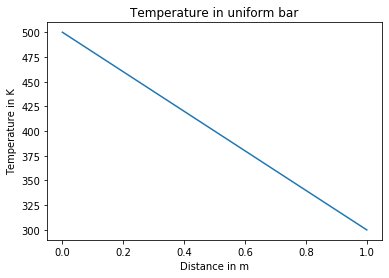

In [5]:
theta_full = np.zeros(N+2)
theta_full[0] = 500
theta_full[1:N+1] = theta
theta_full[N+1] = 300
x = np.linspace(0,1,N+2)
plt.plot(x,theta_full)
plt.xlabel('Distance in m')
plt.ylabel('Temperature in K')
plt.title('Temperature in uniform bar')

## 5. Parabolic equations

### Question 1

In [6]:
def update_temperature(temper, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    n       Temperature timestep to calculate
    zeta    Constant of proportionality
    """
    len_bar = np.size(temper)
    temper_next = np.zeros(len_bar)
    for i in range(1,len_bar-1): # Don't update end-points
        temper_next[i] = zeta*(temper[i+1] + temper[i-1]) + (1.0-2.0*zeta)*temper[i]
    return temper_next

### Question 2

In [7]:
N = 7 # Seven points in domain, 0 and 6 will be fixed
Nt = 40 # Timesteps
temperature = np.zeros((Nt,N))
# Initial conditions
temperature[0] = 300
# Boundary conditions
temperature[:,0] = 500 
temperature[:,N-1] = 300 
zeta = 0.5
for n in range(1,Nt):
    temperature[n] = update_temperature(temperature[n-1],zeta)
    temperature[n,0] = 500
    temperature[n,-1] = 300

### Question 3

Text(0.5, 1.0, 'Temperature distribution along bar for zeta=0.5')

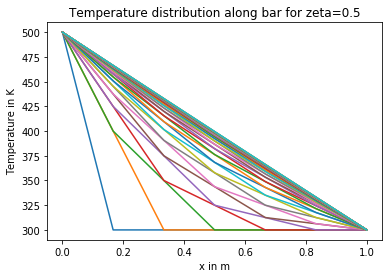

In [8]:
x = np.linspace(0,1,7)
for n in range(0,Nt):
    plt.plot(x,temperature[n])
plt.xlabel('x in m')
plt.ylabel('Temperature in K')
plt.title('Temperature distribution along bar for zeta=0.5')

#### Question 4
The critical value of zeta is a little larger than 0.5; note the (rather small) scale of 1e9 in the top left hand corner of the graph

Text(0.5, 1.0, 'Temperature distribution along bar for zeta=0.7')

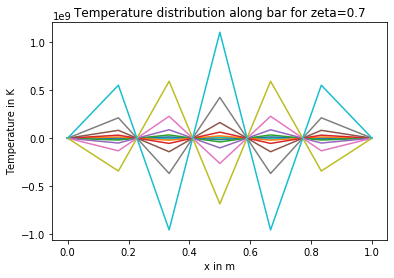

In [9]:
# Initial conditions
temperature[0] = 300
# Boundary conditions
temperature[:,0] = 500 
temperature[:,N-1] = 300 
zeta = 0.7
for n in range(1,Nt):
    temperature[n] = update_temperature(temperature[n-1],zeta)
    temperature[n,0] = 500
    temperature[n,-1] = 300
for n in range(0,Nt):
    plt.plot(x,temperature[n])
plt.xlabel('x in m')
plt.ylabel('Temperature in K')
plt.title('Temperature distribution along bar for zeta=0.7')

## 6. Elliptic equations: iterative approaches

### Question 1

We include the basic Jacobi solver for completeness.

In [10]:
def update_phi(phi, N):
    """Update NxN grid of phi using Jacobi method"""
    phiout = np.copy(phi)
    for i in range(1,N-1):
        for j in range(1,N-1):
            phiout[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] 
                              + phi[i,j-1] + phi[i,j+1])
    return phiout

In [11]:
def update_phi_GS(phi, N):
    """Update NxN grid of phi using Gauss-Seidel method"""
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1])
    return phi

In [12]:
def update_phi_GS_SOR(phi, N, omega):
    """Update NxN grid of phi using SOR and Gauss-Seidel"""
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j] = (1.0+omega)*0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - omega*phi[i,j]
    return phi

### Question 2

In [14]:
N = 15
phi = np.zeros((N,N))
phi[0,:] = 3
phi[N-1,:] = 3
phi[:,0] = 4
phi[:,N-1] = 4
phi[0,0] = 3.5
phi[0,N-1] = 3.5
phi[N-1,0] =  3.5
phi[N-1,N-1] = 3.5

In [15]:
tol = 1e-4
delta = 1.0
iter = 1
while delta > tol:
    phiin = np.copy(phi)
    phi = update_phi_GS(phi,N)
    delta = np.max(np.abs(phiin - phi))
    iter += 1
print("Finished after ",iter," iterations")

Finished after  159  iterations


### Question 3
Note the parameter `levels` that can be passed to `plt.contourf` and experiment to see the effect it has

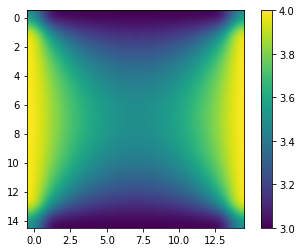

In [16]:
plt.imshow(phi,interpolation='bicubic')
plt.colorbar()

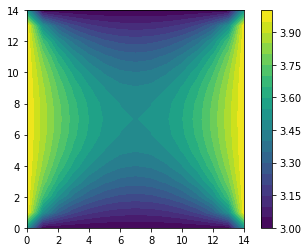

In [17]:
plt.contourf(phi,levels=20)
plt.axis('scaled')
plt.colorbar()

### Question 4
Based on the rough scan below, `omega` should be around 0.7 in this case - but note that it will be system and problem dependent.

In [18]:
N = 15
for omega in (0.1,0.3,0.5,0.7,0.9):
    phi_om0p1 = np.zeros((N,N))
    phi_om0p1[0,:] = 3
    phi_om0p1[N-1,:] = 3
    phi_om0p1[:,0] = 4
    phi_om0p1[:,N-1] = 4
    phi_om0p1[0,0] = 3.5
    phi_om0p1[0,N-1] = 3.5
    phi_om0p1[N-1,0] =  3.5
    phi_om0p1[N-1,N-1] = 3.5
    tol = 1e-4
    delta = 1.0
    iter = 1
    while delta > tol:
        phiin = np.copy(phi_om0p1)
        phi_om0p1 = update_phi_GS_SOR(phi_om0p1,N,omega)
        delta = np.max(np.abs(phiin - phi_om0p1))
        iter += 1
    print("With omega=",omega," finished after ",iter," iterations")

With omega= 0.1  finished after  134  iterations
With omega= 0.3  finished after  92  iterations
With omega= 0.5  finished after  58  iterations
With omega= 0.7  finished after  38  iterations
With omega= 0.9  finished after  114  iterations


## 7. Elliptic equations: matrix approach

### Question 1

In [19]:
def ij_to_index(i,j,N):
    """Convert i,j pair in (NxN) grid to index"""
    return i+j*N

In [20]:
from math import floor
def index_to_ij(index,N):
    """Convert index to i,j pair in (NxN) grid"""
    j = floor(index/N)
    i = index - j*N
    return i,j

In [21]:
def laplace_matrix(N,bx,by):
    """Calculate matrix of Laplacian and boundary condition vector
    N is the total number of points in the grid
    """
    # Set up grid size
    Nx = int(N**0.5)
    # Build diagonal and sub-diagonal arrays
    ondiag = -4*np.ones(N)
    offdiag1 = np.ones(N-1)
    for i in range(1,Nx):
        offdiag1[i*Nx-1] = 0
    offdiag3 = np.ones(N-3)
    # Build matrix
    M = np.diag(ondiag) + np.diag(offdiag1,k=1) + np.diag(offdiag1,k=-1)
    M += np.diag(offdiag3,k=3) + np.diag(offdiag,k=-3)
    # Build RHS using boundary conditions
    b = np.zeros(N)
    for n in range(N):
        i,j = index_to_ij(n,Nx)
        if i==0 or i==Nx-1:
            b[n] -= bx
        if j==0 or j==Nx-1:
            b[n] -= by
    return M, b

In [22]:
N=9
matMlap, blap = laplace_matrix(N,3,4)
print(matMlap)
print(blap)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]
[-7. -4. -7. -3.  0. -3. -7. -4. -7.]


### Question 2

In [23]:
solution = np.dot(np.linalg.inv(matMlap),blap)
potential = np.reshape(solution,(3,3))

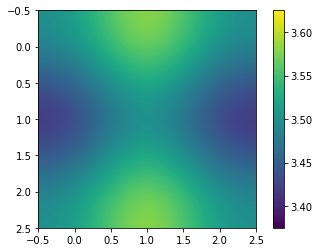

In [24]:
plt.imshow(potential,interpolation='bicubic')
plt.colorbar()

The interpolation makes the image look nicer (less blocky) but you must be careful with how it works.  We can also plot filled contours, or add contours to the image above.

(0.0, 2.0, 0.0, 2.0)

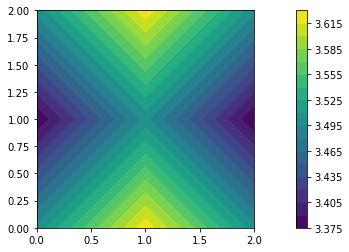

In [27]:
plt.contourf(potential,levels=20)
plt.colorbar()
plt.axis('scaled')

Note that these are quite small grids; when you use the relaxation methods in the alternative approach, it is simple to extend to larger grids which are more realistic.  Notice also that we have not included the boundaries, which is why the plots look a little different to the previous results.